### Brief description of the work

the objective of this wok is to predict if a person is affected by the Parkinson's disease or not. Parkinson’s disease  is a slow, progressive, and chronic neurodegenerative disorder. It affects the human central nervous system by destroying dopaminergic neurons which produce dopamine.

The disease begins 5 to 10 years before any clinical symptoms appear; at this point, approximately half of the dopaminergic neurons have already disappeared.

For that, We propose a data-driven approach for Parkinson’s disease diagnosis. By analysing the signals measured from 8 different locations under each foot (16 signals in total), we extract the different features that describes well the signals ( mean, coefficient of variations, standard deviation ..) and then we apply and compare different machine learning algorithms.    

In [1]:
import pandas as pd
import os.path
from itertools import groupby
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize the dataframe to be filled with the 19 calculated features and our target 'class'
data = pd.DataFrame(columns=["l_mean_stride_time",
                                        "l_mean_swing_time",
                                        "l_mean_percentage_swing",
                                        "r_mean_stride_time",
                                        "r_mean_swing_time",
                                        "r_mean_percentage_swing",
                                        "mean_percentage_double_instance",
                                        "l_cv_duration_stride",
                                        "l_cv_duration_swing",
                                        "l_cv_percentage_swing",
                                        "r_cv_duration_stride",
                                        "r_cv_duration_swing",
                                        "r_cv_percentage_swing",
                                        "mean_short_swing",
                                        "CV_short_swing",
                                        "mean_long_swing",
                                        "CV_long_swing",
                                        "mean_gait_asymmetry",
                                        "CV_gait_asymmetry",
                                        "class"])

#### input data
different txt files containing each the values obtained from different sensors under each foot for a specific subject (one subject per file). You can find a format.txt file explaining the different file names, columns names ..

In [3]:
                          # *************** Upload data ***************    
    
# select dataset Ga / Ju / Si to be able to  work with the 3 different subsets    
names = ["GaCo", "GaPt","JuCo", "JuPt","SiCo", "SiPt"]
target = [0,1]
row,all_rows = [],[]

for name in names:
    for subject in range(1,40,1):
        if subject < 10:
            file_name = name +str(subject).zfill(2)+ "_01.txt"
        else:
            file_name = name +str(subject)+ "_01.txt"
        if os.path.exists(file_name):
            df = pd.read_csv(file_name, sep= '\t', engine='python', header=None, names=['Time', 'LxVGRF1', 'LxVGRF2', 'LxVGRF3', 'LxVGRF4', 'LxVGRF5', 'LxVGRF6', 'LxVGRF7', 'LxVGRF8', 'RxVGRF1', 'RxVGRF2', 'RxVGRF3', 'RxVGRF4', 'RxVGRF5', 'RxVGRF6', 'RxVGRF7', 'RxVGRF8', 'Lx Total Force', 'Rx Total Force'])
            
                        # *************** Data Pre-processing ***************

# get the values of the total force under foot
            left = df['Lx Total Force'].values
            right = df['Rx Total Force'].values

# filter Total Force: each value < 50 is considered as swing phase (foot not on the ground)
            left[left < 50] = 0
            right [right < 50] = 0

# split the data into swing(foot not on the ground) and stance(foot on the ground) phases by grouping the forces equal to zero and the forces not equal to zero.
            l = [list(group) for key, group in groupby(left, lambda x:x!=0)]
            r = [list(g) for k,g in groupby(right, lambda x:x!=0)]


                      # *************** Features calculation ***************

#calculation of the stride cycle left foot 

            l_stride_cycle,l_swing,l_stance = [],[],[]
            if all([el == 0 for el in l[0]]):
                for i in range(1,len(l),2):
                    l_stance.append(l[i])
                for i in range(2,len(l),2):
                    l_swing.append(l[i]) 
                for element1, element2 in zip(l_stance, l_swing):
                    l_stride_cycle.append(element1 + element2)
            else:
                for i in range(0,len(l),2):
                    l_stance.append(l[i])
                for i in range(1,len(l),2):
                    l_swing.append(l[i]) 
                for element1, element2 in zip(l_stance, l_swing):
                    l_stride_cycle.append(element1 + element2) 

#calculation of the stride cycle right foot

            r_stride_cycle,r_swing,r_stance = [],[],[]
            if all([el == 0 for el in r[0]]):
                for i in range(1,len(r),2):
                    r_stance.append(r[i])
                for i in range(2,len(r),2):
                    r_swing.append(r[i]) 
                for element1, element2 in zip(r_stance, r_swing):
                    r_stride_cycle.append(element1 + element2)
            else:
                for i in range(0,len(r),2):
                    r_stance.append(r[i])
                for i in range(1,len(r),2):
                    r_swing.append(r[i]) 
                for element1, element2 in zip(r_stance, r_swing):
                    r_stride_cycle.append(element1 + element2)

#Note: to ignore starting and stopping effects, we removed the first stride cycle.
#mean/std duration of stride time of the left foot 

            l_stride_time = []
            for element in l_stride_cycle[1:]:
                l_stride_time.append(len(element))
            l_mean_stride_time = np.mean(l_stride_time)
            l_std_stride_time = np.std(l_stride_time)

#mean/std duration of stride time of the left foot 

            r_stride_time = []
            for element in r_stride_cycle[1:]:
                r_stride_time.append(len(element))
            r_mean_stride_time = np.mean(r_stride_time)
            r_std_stride_time = np.std(r_stride_time)

#mean/std duration of the swing time of the left foot

            l_swing_time = []
            for element in l_swing[1:]:
                l_swing_time.append(len(element))
            l_mean_swing_time = np.mean(l_swing_time)
            l_std_swing_time = np.std(l_swing_time)

#mean/std duration of the swing time of the right foot

            r_swing_time = []
            for element in r_swing[1:]:
                r_swing_time.append(len(element))
            r_mean_swing_time = np.mean(r_swing_time)
            r_std_swing_time = np.std(r_swing_time)

#mean/std duration of the double stance time

            s = left*right
            double_stance = []
            for k,g in groupby(s,lambda x:x!=0):
                if k:
                    double_stance.append(list(g))

            double_stance_time = []
            for element in double_stance[1:]:
                double_stance_time.append(len(element))

            mean_double_stance_time = np.mean(double_stance_time)
            std_double_stance_time = np.std(double_stance_time)

#The sampling rate was 100 Hz so the period of each measure is 0.01s 

            l_mean_stride_time=l_mean_stride_time/100
            r_mean_stride_time=r_mean_stride_time/100


            l_std_stride_time=l_std_stride_time/100
            r_std_stride_time=r_std_stride_time/100


            l_mean_swing_time=l_mean_swing_time/100
            r_mean_swing_time=r_mean_swing_time/100


            l_std_swing_time=l_std_swing_time/100
            r_std_swing_time=r_std_swing_time/100


            mean_double_stance_time=mean_double_stance_time/100
            std_double_stance_time=std_double_stance_time/100

# mean in percentage of different features can be used as significant features to describe our input signals for each foot
# this is the percentage of the feature(swing , stance ..) compared to the whole cycle (stride)

            l_mean_percentage_swing = 100 * (l_mean_swing_time / l_mean_stride_time)
            r_mean_percentage_swing = 100 * (r_mean_swing_time / r_mean_stride_time)
            mean_percentage_double_instance = 100 * (mean_double_stance_time / l_mean_stride_time)

# Coefficient of variation of different features is also considered as a useful feature to describe our signal.
# The coefficient of variation (CV) is a statistical measure of the dispersion of data points in a data series around the mean.

# CV in duration :

            l_cv_duration_swing = 100 * (l_std_swing_time / l_mean_swing_time)
            l_cv_duration_stride = 100 * (l_std_stride_time / l_mean_stride_time)

            r_cv_duration_swing = 100 * (r_std_swing_time / r_mean_swing_time)
            r_cv_duration_stride = 100 * (r_std_stride_time / r_mean_stride_time)

# CV_in_percentage:

            l_percentage_std_swing_time = 100 * (l_std_swing_time / l_std_stride_time)
            l_cv_percentage_swing = 100 * (l_percentage_std_swing_time / l_mean_percentage_swing)

            r_percentage_std_swing_time = 100 * (r_std_swing_time / r_std_stride_time)
            r_cv_percentage_swing = 100 * (r_percentage_std_swing_time / r_mean_percentage_swing)

# short/long swing time feature calculation

            if (l_mean_swing_time > r_mean_swing_time):
                mean_short_swing = r_mean_swing_time
                mean_long_swing = l_mean_swing_time
                CV_short_swing = 100 * (r_std_swing_time / r_mean_swing_time)
                CV_long_swing = 100 * (l_std_swing_time / l_mean_swing_time) 
            else:
                mean_short_swing = l_mean_swing_time
                mean_long_swing = r_mean_swing_time
                CV_short_swing = 100 * (l_std_swing_time / l_mean_swing_time)
                CV_long_swing = 100 * (r_std_swing_time / r_mean_swing_time)

# Gait asymmetry feature calculation: it defines the gait balance -> value of 0 implies a perfect gait symmetry, and the more the value is higher the more the degree of gait asymmetry is greater.

            mean_gait_asymmetry = abs(np.log(mean_short_swing / mean_long_swing)) * 100
            CV_gait_asymmetry = abs(np.log(CV_short_swing / CV_long_swing)) * 100

# fill a list wih the calculated features
            if "Co" in name:
                row = [l_mean_stride_time,l_mean_swing_time,l_mean_percentage_swing,r_mean_stride_time,r_mean_swing_time,r_mean_percentage_swing,mean_percentage_double_instance,l_cv_duration_stride,l_cv_duration_swing,l_cv_percentage_swing,
                    r_cv_duration_stride,r_cv_duration_swing,r_cv_percentage_swing,mean_short_swing,CV_short_swing,mean_long_swing,CV_long_swing,mean_gait_asymmetry,CV_gait_asymmetry,int(target[0])]
            elif "Pt" in name:
                row = [l_mean_stride_time,l_mean_swing_time,l_mean_percentage_swing,r_mean_stride_time,r_mean_swing_time,r_mean_percentage_swing,mean_percentage_double_instance,l_cv_duration_stride,l_cv_duration_swing,l_cv_percentage_swing,
                    r_cv_duration_stride,r_cv_duration_swing,r_cv_percentage_swing,mean_short_swing,CV_short_swing,mean_long_swing,CV_long_swing,mean_gait_asymmetry,CV_gait_asymmetry,target[1]]
            
            all_rows.append(row)         

In [4]:
print(" the number of rows of our resulted data is:",len(all_rows))

 the number of rows of our resulted data is: 164


In [5]:
#fill the data dataframe with the calculated features and the target
for i in range(len(all_rows)):
    data.loc[i] = all_rows[i] 

In [6]:
print("the resulted data is:")
data.head()

the resulted data is:


,l_mean_stride_time,l_mean_swing_time,l_mean_percentage_swing,r_mean_stride_time,r_mean_swing_time,r_mean_percentage_swing,mean_percentage_double_instance,l_cv_duration_stride,l_cv_duration_swing,l_cv_percentage_swing,r_cv_duration_stride,r_cv_duration_swing,r_cv_percentage_swing,mean_short_swing,CV_short_swing,mean_long_swing,CV_long_swing,mean_gait_asymmetry,CV_gait_asymmetry,class
0,1.262105,0.475368,37.664721,1.221753,0.470928,38.545270,11.676612,15.775443,7.905381,50.111943,10.093845,12.173912,120.607284,0.470928,12.173912,0.475368,7.905381,0.938526,43.175166,0.0
1,1.142286,0.403238,35.300984,1.114352,0.410185,36.809306,13.728827,21.746347,11.917875,54.804030,14.280155,13.838705,96.908653,0.403238,11.917875,0.410185,13.838705,1.708153,14.943005,0.0
2,1.272340,0.442021,34.740803,1.262105,0.472211,37.414512,13.803820,16.953000,11.076151,65.334459,9.011868,6.006907,66.655512,0.442021,11.076151,0.472211,6.006907,6.606690,61.188427,0.0
3,1.249062,0.469896,37.619882,1.253854,0.452917,36.121957,13.058499,6.895821,12.666757,183.687447,6.008491,5.637356,93.823158,0.452917,5.637356,0.469896,12.666757,3.680289,80.956592,0.0
4,1.070000,0.351161,32.818758,1.051579,0.356842,33.933934,16.408428,13.212818,15.840448,119.886973,4.053333,10.434864,257.439103,0.351161,15.840448,0.356842,10.434864,1.604941,41.741412,0.0


In [7]:
data[['l_mean_stride_time','l_mean_swing_time', 'r_mean_stride_time','r_mean_swing_time']].head()

,l_mean_stride_time,l_mean_swing_time,r_mean_stride_time,r_mean_swing_time
0,1.262105,0.475368,1.221753,0.470928
1,1.142286,0.403238,1.114352,0.410185
2,1.272340,0.442021,1.262105,0.472211
3,1.249062,0.469896,1.253854,0.452917
4,1.070000,0.351161,1.051579,0.356842


By interpreting the 5 first obtained rows in our resulted dataset, we can confirm its conformity with the real case' values for a person that is not affected with Parkinson's disease (PD).

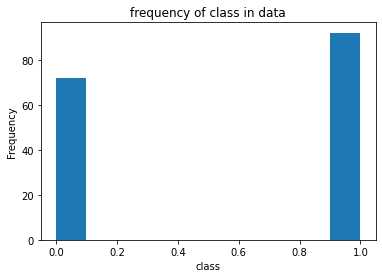

In [8]:
                      # *************** Data visualization ***************
data['class'].plot.hist()
plt.xlabel('class')
plt.title('frequency of class in data')
plt.show()

We can see here that we have almost 93 patients suffering from Parkinson’s disease and 72 healthy subjects which makes our data a balanced one. 

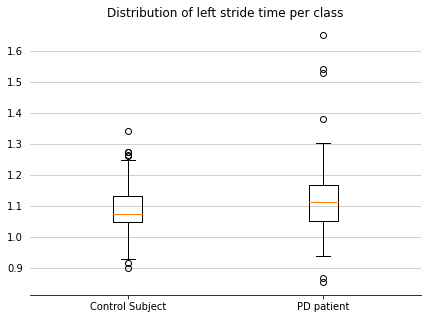

In [9]:
#l_mean_stride_time per case (0 or 1)
subject_lstride_time = data[data['class'] == 0]['l_mean_stride_time']
PD_patient_lstride_time = data[data['class'] == 1]['l_mean_stride_time']

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(7, 5))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.75,alpha=0.5)

# Set plot title
ax.set_title('Distribution of left stride time per class')

# Set the data and labels for the boxplot
dataset = [subject_lstride_time, PD_patient_lstride_time]
labels = ['Control Subject', 'PD patient']
ax.boxplot(dataset, labels=labels)

plt.show()

By comparing the box plots, we can notice that PD patients have longer left stride time range compared the the control subjects. 

Also, both plots present some outliers but the PD patient plot's outliers are more remarquable and away from the max of the set values.

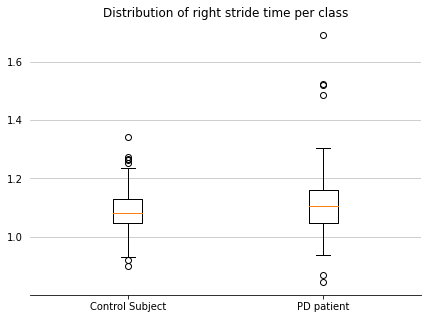

In [10]:
#r_mean_stride_time per case (0 or 1)
subject_rstride_time = data[data['class'] == 0]['r_mean_stride_time']
PD_patient_rstride_time = data[data['class'] == 1]['r_mean_stride_time']

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(7, 5))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.75,alpha=0.5)

# Set plot title
ax.set_title('Distribution of right stride time per class')

# Set the data and labels for the boxplot
dataset = [subject_rstride_time, PD_patient_rstride_time]
labels = ['Control Subject', 'PD patient']
ax.boxplot(dataset, labels=labels)

plt.show()

We can notice that the left and right stride time boxplots for a control subject are similar which is logically acceptable since the gait cycle is symetric. However, it's not the same for PD patient.

The outliers of the PD patient's right stride time's box plot are more important and scattered and it has a larger time range than the normal subject

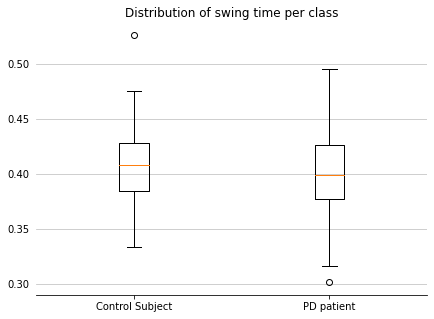

In [11]:
#swing time per case (0 or 1)
subject_swing_time = data[data['class'] == 0]['l_mean_swing_time']
PD_patient_swing_time = data[data['class'] == 1]['l_mean_swing_time']

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(7, 5))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.75,alpha=0.5)

# Set plot title
ax.set_title('Distribution of swing time per class')

# Set the data and labels for the boxplot
dataset = [subject_swing_time, PD_patient_swing_time]
labels = ['Control Subject', 'PD patient']
ax.boxplot(dataset, labels=labels)

plt.show()

We can conclude that swing time range for PD patients is more important and this is shown through the difference in (min, max) in both boxplots.

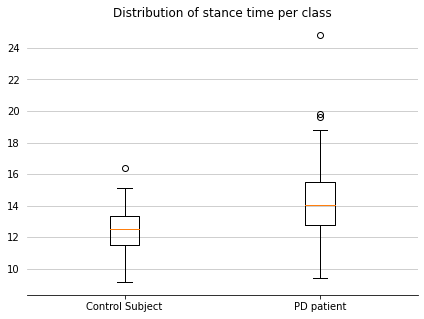

In [12]:
#double stance time per case (0 or 1)
subject_stance_time = data[data['class'] == 0]['mean_percentage_double_instance']
PD_patient_stance_time = data[data['class'] == 1]['mean_percentage_double_instance']

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(7, 5))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.75,alpha=0.5)

# Set plot title
ax.set_title('Distribution of stance time per class')

# Set the data and labels for the boxplot
dataset = [subject_stance_time, PD_patient_stance_time]
labels = ['Control Subject', 'PD patient']
ax.boxplot(dataset, labels=labels)

plt.show()

As the case of stride and swing time, we can notice that PD patients also have longer double stance time range compared the the control subjects. 

Also, the control subject boxplot presents one outliers which is approximately close to the max of the box plot. However, the PD patient boxplot presents multiple outliers where some are far away of the max of its boxplot.

In [14]:
                      # *************** Features selection ***************
    
# we apply PCA to our data so that we can select the most relevant features that are the most represntive of our data.

X = data[["l_mean_stride_time","l_mean_swing_time","l_mean_percentage_swing","r_mean_stride_time","r_mean_swing_time","r_mean_percentage_swing","mean_percentage_double_instance","l_cv_duration_stride","l_cv_duration_swing","l_cv_percentage_swing","r_cv_duration_stride","r_cv_duration_swing","r_cv_percentage_swing","mean_short_swing","CV_short_swing","mean_long_swing","CV_long_swing","mean_gait_asymmetry","CV_gait_asymmetry"]].values
Y = data['class']
print("number of columns before PCA :",len(X[0]))

from sklearn.decomposition import PCA
pca = PCA(n_components=12)
X = pca.fit_transform(X)
print("number of columns after PCA :",len(X[0]))

number of columns before PCA : 19
number of columns after PCA : 12


In [15]:
#features normalization

from sklearn import preprocessing
X = preprocessing.normalize(X)
print(" first dataset's row after normalization: \n \n",X[0])

 first dataset's row after normalization: 
 
 [-0.88425311  0.4610993   0.04094535 -0.01441412 -0.01031118  0.01946792
 -0.03065152 -0.04197203 -0.00778347 -0.01428968 -0.01206566 -0.00165464]


In [39]:
                      # ***************  Prediction ***************
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [55]:
strategy = KFold(n_splits=5, shuffle=True)
metrics = ['accuracy','precision','recall','f1']
supervised_models = [LogisticRegression(),KNeighborsClassifier(n_neighbors=5),RandomForestClassifier(n_estimators=100)]



         *******************************          
               LogisticRegression()               
        ******************************* 
         
accuracy 0.5916666666666666
precision 0.6026635720601237
recall 0.8244815246672832
f1 0.6585753000387148


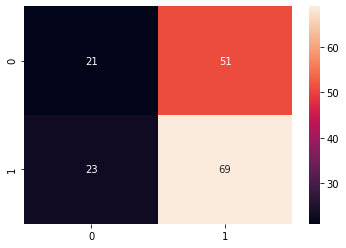



         *******************************          
              KNeighborsClassifier()              
        ******************************* 
         
accuracy 0.5428030303030302
precision 0.5767433522191903
recall 0.6262823725981621
f1 0.5992318534178999


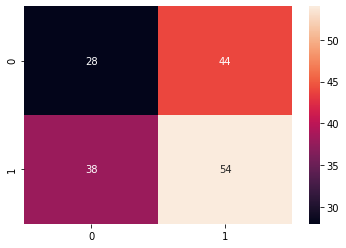



         *******************************          
             RandomForestClassifier()             
        ******************************* 
         
accuracy 0.6892045454545455
precision 0.7280873753009975
recall 0.7215873015873016
f1 0.6935469199173235


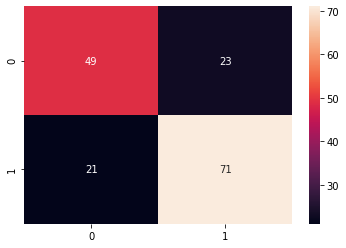

In [54]:
for model in supervised_models:
    print('\n')
    print("*******************************".center(50))
    print(str(model).center(50))
    print("******************************* \n".center(50))
    for metric in metrics:
        scores = cross_val_score(model,X,Y,scoring = metric,cv=strategy)
        print(metric, np.mean(scores))
    y_pred = cross_val_predict(model, X, Y, cv=strategy)
    conf_mat = confusion_matrix(Y, y_pred)
    sns.heatmap(conf_mat,annot = True)
    plt.show()

### when comparing the results of the 3 used models and thier confusions matrices, we can conclude that for a supervised maching learning classification, the random forest model gave us the best results since it predicted highest number of true predictions(true positives and true negatives). In addition, the random forest classication has the highest f_score which indicates good recall and precision scores. 